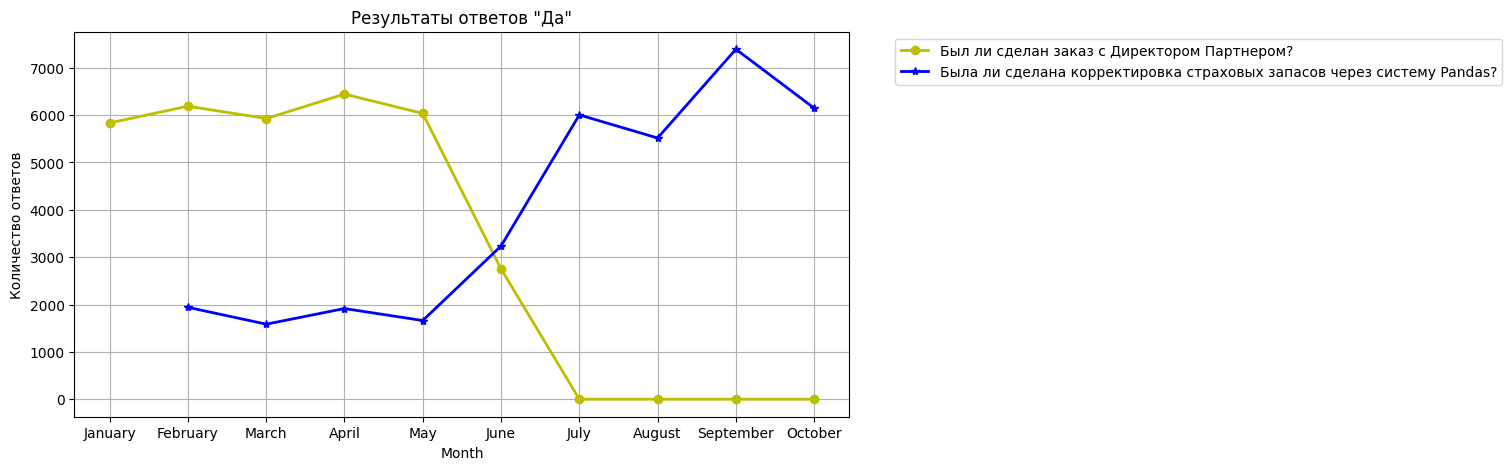

,Number_Month,Month of answer,Question Description,Yes,No
0,1,January,Был ли сделан заказ с Директором Партнером?,5835,29706
1,2,February,Был ли сделан заказ с Директором Партнером?,6189,31465
2,2,February,Была ли сделана корректировка страховых запасо...,1941,5788
3,3,March,Был ли сделан заказ с Директором Партнером?,5928,32413
4,3,March,Была ли сделана корректировка страховых запасо...,1585,5827
5,4,April,Был ли сделан заказ с Директором Партнером?,6445,36219
6,4,April,Была ли сделана корректировка страховых запасо...,1915,6493
7,5,May,Был ли сделан заказ с Директором Партнером?,6035,30819
8,5,May,Была ли сделана корректировка страховых запасо...,1662,5310
9,6,June,Был ли сделан заказ с Директором Партнером?,2752,20551


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

read_excel_file = pd.read_excel("Questionnaire.xlsx")
main = pd.DataFrame(read_excel_file)

main['Date of answer'] = pd.to_datetime(main['Date of answer'])
main['Number_Month'] = main['Date of answer'].dt.month
main['Month of answer'] = main['Date of answer'].dt.month_name()
main['Yes'] = main['Value of answer (text, initial)'].apply(lambda x: 1 if isinstance(x, str) and x.strip().lower() == 'да' else 0)
main['No'] = main['Value of answer (text, initial)'].apply(lambda x: 1 if isinstance(x, str) and x.strip().lower() == 'нет' else 0)

grouped_main = main.groupby(['Number_Month','Month of answer','Question Description']).sum('Yes').reset_index()

DP = grouped_main[grouped_main['Question Description']== 'Был ли сделан заказ с Директором Партнером?']
App_Pandas = grouped_main[grouped_main['Question Description']== 'Была ли сделана корректировка страховых запасов через систему Pandas?']

plt.figure(figsize=(10, 5))
month_dp = DP['Month of answer']
month_pd = App_Pandas['Month of answer']
yes_dp = DP['Yes']
ap_pd = App_Pandas['Yes']

plt.plot(month_dp, yes_dp, marker='o', color='y', linestyle='-', linewidth=2, label='Был ли сделан заказ с Директором Партнером?')
plt.plot(month_pd, ap_pd, marker='*', color='b', linestyle='-', linewidth=2, label='Была ли сделана корректировка страховых запасов через систему Pandas?')

plt.title('Результаты ответов "Да"')
plt.xlabel('Month')
plt.ylabel('Количество ответов')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
grouped_main